In [ ]:
#Hanfei Geng hgeng4

threshold: 2000000000


/home/hanfei/anaconda2/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


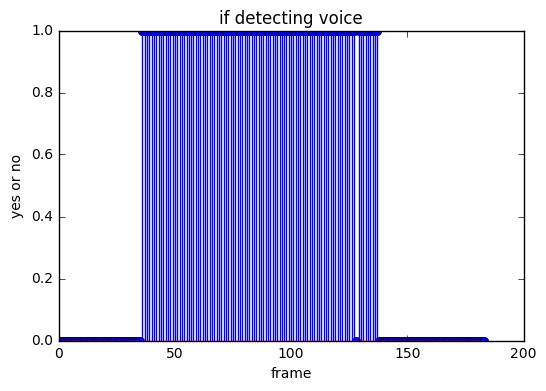

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write

FRAME_SIZE = 2048
threshold = 2000000000
print("threshold: "+str(threshold))

def ece420ProcessFrame(frame):
    isVoiced = 0

    #### YOUR CODE HERE ####
    square = [(frame[i])**2 for i in range(len(frame))]
    #print(sum(square))
    
    if sum(square) > threshold:
        isVoiced = 1
    return isVoiced


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

numFrames = int(len(data) / FRAME_SIZE)
framesVoiced = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    framesVoiced[i] = ece420ProcessFrame(frame.astype(float))

plt.figure()
plt.stem(framesVoiced)
plt.title("if detecting voice")
plt.xlabel("frame")
plt.ylabel("yes or no")
plt.show()

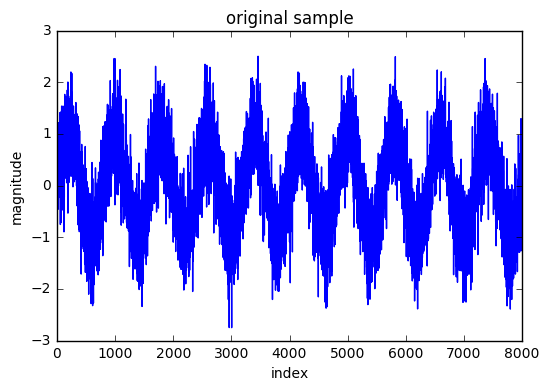

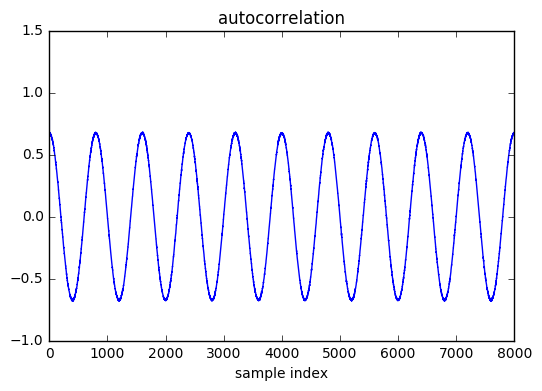

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 10        # Tune Frequency is 10 Hz
tune = np.sin(2*np.pi*freq*t)

# Add some Gaussian noise 
tune += np.random.normal(0, 0.5, duration * fs)

plt.figure()
plt.plot(tune)
plt.title("original sample")
plt.xlabel('index')
plt.ylabel('magnitude')
# Start a new figure for your autocorrelation plot 
plt.figure() 

# Your code here
normalization = sum([(tune[i])**2 for i in range(len(tune))])

autocorrelation = []
for l in range(len(tune)):
    correlation_sequence = [tune[i] * tune[i-l] for i in range(len(tune))]
    autocorrelation.append((sum(correlation_sequence/normalization)))
    
plt.plot(autocorrelation)
plt.title("autocorrelation")
plt.xlabel('sample index')
#print min(autocorrelation,key = lambda t:t[1])

# Only call plt.show() at the very end of the script 
plt.show()


In [2]:
print "delayed samples: 800, T = 0.1s f = 10Hz"

delayed samples: 800, T = 0.1s f = 10Hz
